# Phase 3 Covid-19 Primary Election Response
## Did Covid-19(Coronavirus) affect the support of the top two democratic primary candidates?

Coronavirus made its first appearance in the world in late November, early December 2019. It made its way to the U.S. towards the beginning of January 2020.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
primary_df = pd.read_csv("president_primary_polls.csv")


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# California Survey

Did the coronavirus's appearance in the U.S. change the support for the two front runners of the democratic primary in California?

In [2]:
california_primary_df = primary_df[primary_df.state == "California"]
california_primary_df.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Sanders,13257,Bernard Sanders,34.1
1,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Warren,13258,Elizabeth Warren,14.0
2,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,14.0
3,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Bloomberg,13289,Michael Bloomberg,11.7
4,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Buttigieg,13345,Pete Buttigieg,8.8


In [3]:
bernie = california_primary_df[california_primary_df.candidate_id == 13257]
bernie = bernie[bernie.notes != "head-to-head poll"]
biden = california_primary_df[california_primary_df.candidate_id == 13256]
biden = biden[biden.notes != "head-to-head poll"]

Remove head-to-head polling results because they skew the numbers higher because there are only two candidates

In [4]:
df=bernie.set_index('poll_id')
time = np.arange(len(df))
time = np.flip(time,0)
df['time'] = time
df.reset_index(inplace = True)
df.head()

,poll_id,question_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,time
0,64627,119292,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Sanders,13257,Bernard Sanders,34.1,50
1,64614,119207,2020,California,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,2/28/20 12:13,NaN,https://cdn.cnn.com/cnn/2020/images/02/28/rel1...,primary,DEM,Sanders,13257,Bernard Sanders,35.0,49
2,64533,118942,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,2/26/20 09:41,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Sanders,13257,Bernard Sanders,33.6,48
3,64595,119181,2020,California,1363,"University of California, Berkeley",300,LA Times,"University of California, Berkeley",457.0,...,2/28/20 05:04,NaN,https://escholarship.org/uc/item/40m769v7,primary,DEM,Sanders,13257,Bernard Sanders,33.7,47
4,64529,118924,2020,California,1365,Change Research,1186,KQED,Change Research,48.0,...,2/26/20 07:28,NaN,https://www.changeresearch.com/post/democratic...,primary,DEM,Sanders,13257,Bernard Sanders,37.0,46


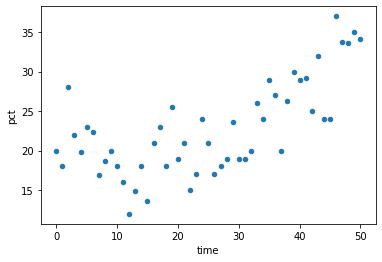

In [5]:
df.plot(kind='scatter', x='time', y='pct')

The scatter plot shows a level support base in the beginning, but starting around 35, which corresponds to the end of December/begining of January there is a rise in support for Bernie. This corresponds to the increased presence of the Cornonavirus in the U.S.

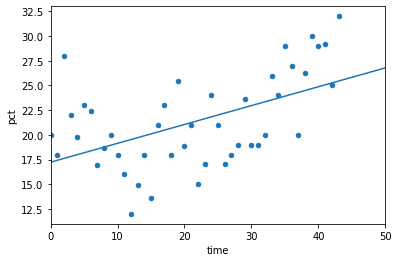

In [6]:
df_train = df.loc[7:].copy()
df_test = df.loc[:6].copy()

X_train = df_train[["time"]]
X_test = df_test[["time"]]
y_train = df_train["pct"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 0 to 50
X_new["time"] = np.linspace(0, 50, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new["time"]    # x values in Series.plot.line()
)

# plot the data, then the model
df_train.plot.scatter(x="time", y="pct")
y_new_.plot.line()

In [7]:
model.coef_

array([0.19105004])

An overall positive trend in support for Bernie Sanders

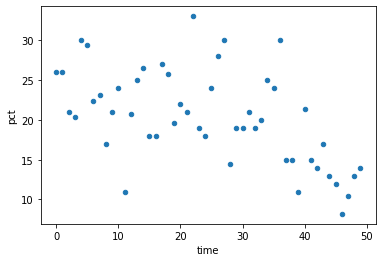

In [8]:
df=biden.set_index('poll_id')
time = np.arange(len(df))
time = np.flip(time,0)
df['time'] = time
df.reset_index(inplace = True)

df.plot(kind='scatter', x='time', y='pct')

The scatter plot shows a level support base in the beginning, but starting around 35, which corresponds to the end of December/begining of January there is a drop in support for Biden. This corresponds to the increased presence of the Cornonavirus in the U.S.

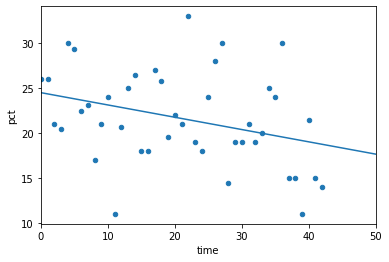

In [9]:
df_train = df.loc[7:].copy()
df_test = df.loc[:6].copy()

X_train = df_train[["time"]]
X_test = df_test[["time"]]
y_train = df_train["pct"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 0 to 50
X_new["time"] = np.linspace(0, 50, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new["time"]    # x values in Series.plot.line()
)

# plot the data, then the model
df_train.plot.scatter(x="time", y="pct")
y_new_.plot.line()

In [10]:
model.coef_

array([-0.13696768])

An overall negative trend in support for Joe Bidden

# Conclusion in California
In California there is a noticable rise in support for Bernie, and drop in support for Biden. The time of this change corresponds to the beginning of the coronavirus in the U.S. and the candidates favor for universal healthcare could be why there is such a rise in support for Bernie Sanders and drop for Joe Biden

# Entire US Survey
Did the appearance of Coronavirus affect the support for the candidates in the U.S. as a whole?

In [11]:
bernie = primary_df[primary_df.candidate_id == 13257]
bernie = bernie[bernie.notes != "head-to-head poll"]
biden = primary_df[primary_df.candidate_id == 13256]
biden = biden[biden.notes != "head-to-head poll"]

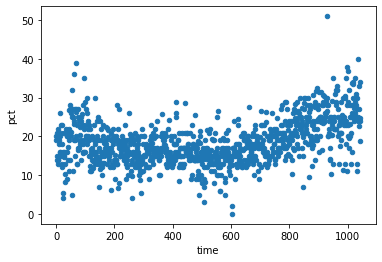

In [12]:
df=bernie.set_index('poll_id')
time = np.arange(len(df))
time = np.flip(time,0)
df['time'] = time
df.reset_index(inplace = True)
df.plot(kind='scatter', x='time', y='pct')

Even in the U.S. there is a rise in support for Bernie Sanders near the onset of the corona virus in the states. The trend in California seems to be across the entire U.S.

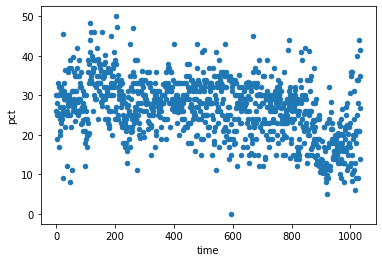

In [13]:
df=biden.set_index('poll_id')
time = np.arange(len(df))
time = np.flip(time,0)
df['time'] = time
df.reset_index(inplace = True)
df.plot(kind='scatter', x='time', y='pct')

Similarly like in California, there is a drop in Biden support in later polls once the coronavirus is starting to infect more and more people in the U.S.

# Conclusion for U.S.

Like in California, the entire U.S. shared the increase in support for Bernie and decline in support for Biden. This correlates to the arrival of the coronavirus in the U.S. at the beginning of January and may be caused by Bernie's policy of universal healthcare, because if people cannot even get tested for the virus they may be seeing cracks in the healthcare system we have today.